In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
df= pd.read_csv("train_data_beijing.csv",encoding="utf-8",index_col = 0)
price_mean=df.iloc[:,-1].mean()
df1=df[df.iloc[:,-1]<price_mean*1.2]
df1.price = df1.price/df1.room_area
df1.head()
#df.shape

d:\python\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,num_bed_room,num_living_room,room_area,total_height,metro_distance,metro_number,CBD_distance,CBD_number,hosp_distance,hosp_number,...,district_昌平,district_朝阳,district_海淀,district_石景山,district_西城,district_通州,district_门头沟,district_顺义,elevator_有电梯,price
0,2,1,16.0,7.0,1.294840,0.0,0.895099,1.0,1.936680,0.0,...,0,0,0,0,0,0,0,0,1,118.125000
1,2,1,12.0,10.0,0.339292,2.0,0.935198,1.0,0.465280,3.0,...,0,0,0,0,0,0,0,0,1,209.166667
2,2,1,13.0,18.0,1.378246,0.0,0.261457,1.0,2.338756,0.0,...,0,0,0,0,0,0,0,0,1,150.000000
3,2,1,12.0,10.0,0.339292,2.0,0.935198,1.0,0.465280,3.0,...,0,0,0,0,0,0,0,0,1,208.333333
4,2,1,15.0,6.0,0.083615,1.0,0.615220,1.0,1.109603,0.0,...,0,0,0,0,0,0,0,0,0,126.000000


In [2]:
n=df1.shape[0]
k=df1.shape[1]-1
x=df1.iloc[:,:k]
X=sm.add_constant(x)
y=df1.iloc[:,-1]
y_mean=y.mean()
model1=sm.OLS(y,X)
results1=model1.fit()
print(results1.summary())

d:\python\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     136.9
Date:                Sun, 19 Jan 2020   Prob (F-statistic):               0.00
Time:                        20:28:09   Log-Likelihood:                -13628.
No. Observations:                2885   AIC:                         2.732e+04
Df Residuals:                    2852   BIC:                         2.752e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               232.1267      9.00

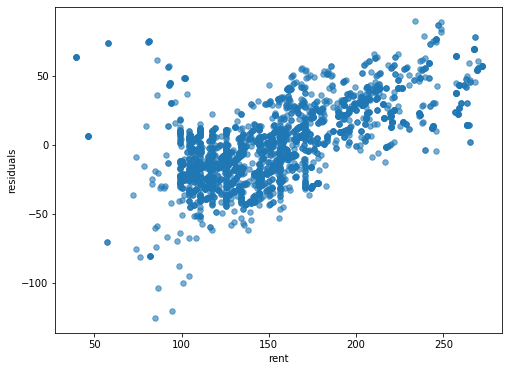

In [3]:
#x1=np.linspace(0,n-1,n)
fig, ax = plt.subplots(figsize=(8,6))
plt.scatter(y, y-results1.fittedvalues,s=30,alpha=0.6)
#plt.scatter(x1, results1.fittedvalues,s=30,c='r',label="OLS",alpha=0.6)

plt.xlabel("rent")
plt.ylabel("residuals")
plt.show()

In [5]:
X_new=X.iloc[:,[0,1,2,3,4,5,6,7,9,10,23,24,25,26,27,28,29,30,31,32,33]]
model2=sm.OLS(y,X_new)
results2=model2.fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.557
Model:                            OLS   Adj. R-squared:                  0.554
Method:                 Least Squares   F-statistic:                     179.9
Date:                Sun, 19 Jan 2020   Prob (F-statistic):               0.00
Time:                        20:29:21   Log-Likelihood:                -13796.
No. Observations:                2885   AIC:                         2.763e+04
Df Residuals:                    2864   BIC:                         2.776e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             225.1385     10.291     

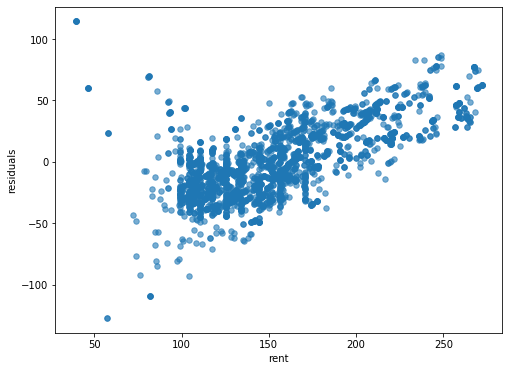

In [6]:
fig, ax = plt.subplots(figsize=(8,6))
plt.scatter(y, y-results2.fittedvalues,s=30,alpha=0.6)
#plt.scatter(x1, results2.fittedvalues,c='r',s=30,alpha=0.6,label="OLS")
plt.xlabel("rent")
plt.ylabel("residuals")
plt.show()

In [10]:
from sklearn.decomposition import PCA
contribution=np.cumsum(pca.explained_variance_ratio_)
contribution

array([0.43242055, 0.68540487, 0.8855841 , 0.9160251 , 0.94012143,
       0.95191113, 0.9620934 , 0.96840904, 0.97367798, 0.9778925 ,
       0.98077464, 0.98344456, 0.98590098, 0.98830643, 0.99035679,
       0.99197666, 0.99324964, 0.9944598 , 0.99550857, 0.9965561 ,
       0.99741505, 0.99822561, 0.99876289, 0.99917283, 0.99949719])

In [9]:
pca = PCA(n_components=25)
pca.fit(x)
reduced_x=pca.fit_transform(x)
reduced_X=sm.add_constant(reduced_x)
y_norm=(y-y.mean())/y.std()
model3=sm.OLS(y_norm,reduced_X)
results3=model3.fit()
print(results3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     104.2
Date:                Sun, 19 Jan 2020   Prob (F-statistic):               0.00
Time:                        20:29:36   Log-Likelihood:                -3158.9
No. Observations:                2885   AIC:                             6370.
Df Residuals:                    2859   BIC:                             6525.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.134e-17      0.014   5.27e-15      1.0

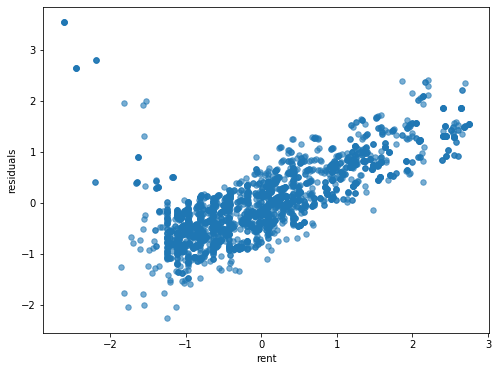

In [11]:
fig, ax = plt.subplots(figsize=(8,6))
plt.scatter(y_norm, y_norm-results3.fittedvalues,s=30,alpha=0.6)
#plt.scatter(x1, results3.fittedvalues,c='r',s=30,alpha=0.6,label="PCA")
plt.xlabel("rent")
plt.ylabel("residuals")
plt.show()

In [12]:
from sklearn.linear_model import Ridge,RidgeCV
#model = RidgeCV(alphas=[0.1, 1.0, 10.0])
model=RidgeCV(alphas=[0.1, 1.0, 10.0], cv=None, fit_intercept=True, scoring=None, normalize=True)
model.fit(x, y) 
print('系数矩阵:\n',model.coef_)
print('常数项:\n',model.intercept_)
print('线性回归模型:\n',model)
Ridge = model.predict(x)
print('最佳的alpha：',model.alpha_)

系数矩阵:
 [ 2.17990694e+01 -1.25816420e+01 -6.43315245e+00  5.58106021e-02
 -3.48552171e+00  8.88555916e-01  3.34326228e+00 -9.28778310e-01
 -8.89084192e-01  9.57364214e-01 -1.53575339e-01  1.65758471e+00
  2.83608336e+00 -9.81445720e-01  0.00000000e+00  0.00000000e+00
  8.06753981e+01  1.42877387e+00  1.65977129e+00 -1.02178174e+00
 -3.70420008e+00  0.00000000e+00  1.20775331e+02 -1.56358163e+01
  5.26539846e+01 -1.83772974e+01 -9.87326198e+00 -1.79404614e+01
  7.36078293e+00  9.10323986e-01 -1.29537646e+01 -8.59608935e+00
 -2.63913484e+01 -1.73264852e+01 -2.10884327e+01  2.23910133e+00]
常数项:
 210.8441425933113
线性回归模型:
 RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=None, fit_intercept=True,
        gcv_mode=None, normalize=True, scoring=None, store_cv_values=False)
最佳的alpha： 0.1


No handles with labels found to put in legend.


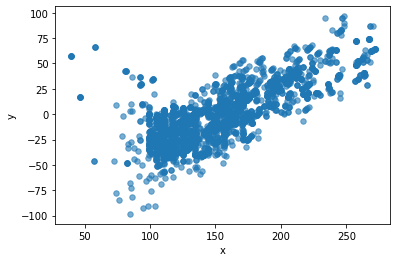

R_square： 0.5804660314392677
R_square_adjust： 0.5751629335220674


In [13]:
#plt.scatter(x1, y,label="data",s=30,alpha=0.6)
plt.scatter(y, y-Ridge,label="Ridge",s=30,alpha=0.6)
ax.legend(loc='best')
plt.xlabel("x")
plt.ylabel("y")
plt.show()
RSS=np.sum((y-Ridge)**2)
TSS=np.sum((y-y_mean)**2)
R_square_Ridge=1-RSS/TSS
R_adj_Ridge=1-(n-1)*(1-R_square_Ridge)/(n-k-1)
print('R_square：',R_square_Ridge)
print('R_square_adjust：',R_adj_Ridge)

In [14]:
from sklearn.linear_model import Lasso,LassoCV,LassoLarsCV 
#model = LassoCV(alphas=[0.1, 1.0, 10.0])
model=LassoCV(alphas=[0.001,0.01,0.1, 1.0, 10.0], cv=None, fit_intercept=True, normalize=True)
model.fit(x, y)
print('系数矩阵:\n',model.coef_)
print('常数项:\n',model.intercept_)
print('线性回归模型:\n',model)
LASSO = model.predict(x)
print('最佳的alpha：',model.alpha_)

系数矩阵:
 [ 2.30993579e+01 -7.32094053e+00 -8.37306323e+00  5.52134525e-02
 -4.89801716e+00  4.74229944e-01  3.63584995e+00 -1.05735986e+00
 -9.48064330e-02  6.32631138e-01  1.42254434e-01  1.50290015e+00
  2.96433972e+00  2.94712331e-01  0.00000000e+00  0.00000000e+00
  1.15257773e+02  2.78065836e+00  3.37434684e+00 -0.00000000e+00
 -2.10341414e+00  0.00000000e+00  1.87819920e+02 -3.08098565e+01
  3.37620938e+01 -3.69123767e+01 -2.71953530e+01 -3.70787175e+01
 -8.22764747e+00 -1.45663461e+01 -2.99717283e+01 -2.15303310e+01
 -4.74007450e+01 -3.85748164e+01 -4.16052974e+01  2.25723331e+00]
常数项:
 247.60656043614927
线性回归模型:
 LassoCV(alphas=[0.001, 0.01, 0.1, 1.0, 10.0], copy_X=True, cv=None, eps=0.001,
        fit_intercept=True, max_iter=1000, n_alphas=100, n_jobs=None,
        normalize=True, positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)
最佳的alpha： 0.001


No handles with labels found to put in legend.


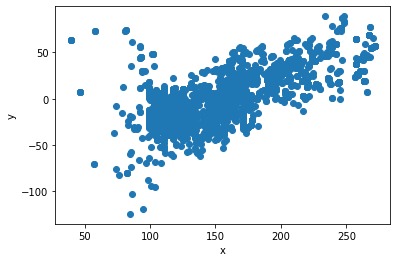

R_square： 0.6051548618390507
R_square_adjust： 0.6001638418342072


In [15]:
#plt.scatter(x1, y,label="data")
plt.scatter(y, y-LASSO,label="LASSO")
ax.legend(loc='best')
plt.xlabel("x")
plt.ylabel("y")
plt.show()
RSS_LASSO=np.sum((y-LASSO)**2)
TSS=np.sum((y-y_mean)**2)
R_square_LASSO=1-RSS_LASSO/TSS
R_adj_LASSO=1-(n-1)*(1-R_square_LASSO)/(n-k-1)
print('R_square：',R_square_LASSO)
print('R_square_adjust：',R_adj_LASSO)